In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img=cv2.imread('TREE.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

(np.float64(-0.5), np.float64(1112.5), np.float64(834.5), np.float64(-0.5))

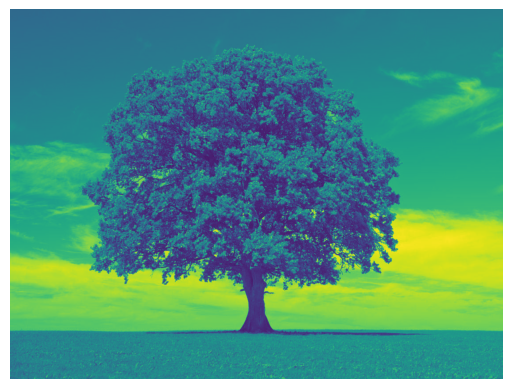

In [3]:
plt.imshow(img)
plt.axis('off')

In [4]:
img.dtype

dtype('uint8')

In [6]:
dft = np.fft.fft2(img)
dft_shift = np.fft.fftshift(dft)

In [8]:
dft_shift.shape

(835, 1113)

In [15]:
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2

In [16]:
u = np.arange(rows)
v = np.arange(cols)
U, V = np.meshgrid(u, v, indexing='ij')
D = np.sqrt((U - crow)**2 + (V - ccol)**2)

In [17]:
#IDEAL
D0 = 50
H_ilpf = np.zeros((rows, cols))
H_ilpf[D <= D0] = 1

filtered = dft_shift * H_ilpf
img_back = np.fft.ifft2(np.fft.ifftshift(filtered))
img_ilpf = np.abs(img_back)

In [18]:
#IDEAL high pass
H_ihpf = 1 - H_ilpf
filtered = dft_shift * H_ihpf
img_ihpf = np.abs(np.fft.ifft2(np.fft.ifftshift(filtered)))

In [26]:
#buttersworth low pass
D0 = 50
n = 2

H_blpf = 1 / (1 + (D / D0)**(2 * n))
filtered = dft_shift * H_blpf
img_blpf = np.abs(np.fft.ifft2(np.fft.ifftshift(filtered)))


In [ ]:
#buttersworth high pass
H_bhpf = 1 - H_blpf
filtered = dft_shift * H_bhpf
img_bhpf = np.abs(np.fft.ifft2(np.fft.ifftshift(filtered)))

In [ ]:
#gaussian Low pass
D0 = 50
H_glpf = np.exp(-(D**2) / (2 * D0**2))
filtered = dft_shift * H_glpf
img_glpf = np.abs(np.fft.ifft2(np.fft.ifftshift(filtered)))

In [29]:
#gaussian High pass
H_ghpf = 1 - H_glpf
filtered = dft_shift * H_ghpf
img_ghpf = np.abs(np.fft.ifft2(np.fft.ifftshift(filtered)))


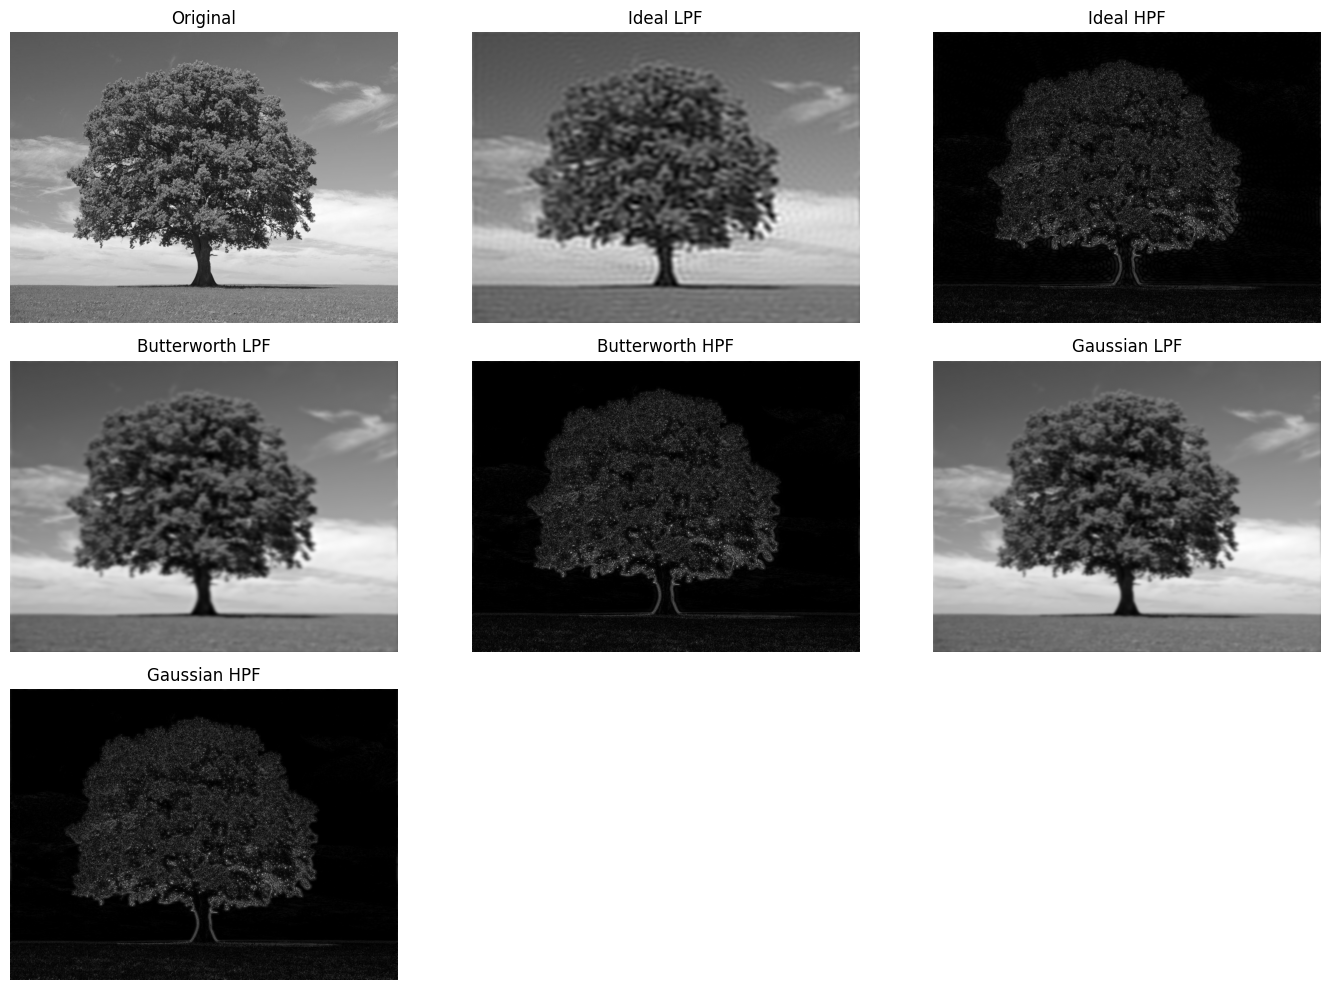

In [32]:
plt.figure(figsize=(14, 10))

plt.subplot(3, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(3, 3, 2)
plt.imshow(img_ilpf, cmap='gray')
plt.title('Ideal LPF')
plt.axis('off')

plt.subplot(3, 3, 3)
plt.imshow(img_ihpf, cmap='gray')
plt.title('Ideal HPF')
plt.axis('off')

plt.subplot(3, 3, 4)
plt.imshow(img_blpf, cmap='gray')
plt.title('Butterworth LPF')
plt.axis('off')

plt.subplot(3, 3, 5)
plt.imshow(img_bhpf, cmap='gray')
plt.title('Butterworth HPF')
plt.axis('off')

plt.subplot(3, 3, 6)
plt.imshow(img_glpf, cmap='gray')
plt.title('Gaussian LPF')
plt.axis('off')

plt.subplot(3, 3, 7)
plt.imshow(img_ghpf, cmap='gray')
plt.title('Gaussian HPF')
plt.axis('off')

plt.tight_layout()
plt.show()
